<a href="https://colab.research.google.com/github/sakshimodi04/Data_Science/blob/main/decision_tree_fraud_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:
df=pd.read_csv('/content/Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [ ]:
df.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
df.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [ ]:
df.shape

(600, 6)

In [ ]:
df= pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'],drop_first=True)

In [ ]:
df["TaxInc"] = pd.cut(df["Taxable.Income"],bins=[10002,30000,99620], labels=["Risky","Good"])

In [ ]:
print(df)

     Taxable.Income  City.Population  Work.Experience  Undergrad_YES  \
0             68833            50047               10              0   
1             33700           134075               18              1   
2             36925           160205               30              0   
3             50190           193264               15              1   
4             81002            27533               28              0   
..              ...              ...              ...            ...   
595           76340            39492                7              1   
596           69967            55369                2              1   
597           47334           154058                0              0   
598           98592           180083               17              1   
599           96519           158137               16              0   

     Marital.Status_Married  Marital.Status_Single  Urban_YES TaxInc  
0                         0                      1          1   

In [ ]:
#lets assume:
# taxable income <=30000 as risky = 0 and others as good = 1

In [ ]:
# after creating new cols TaxInc also has dummies var concating to df
df = pd.get_dummies(df,columns=['TaxInc'],drop_first = True)

In [ ]:
df.tail(20)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
580,31721,123335,1,1,0,0,1,1
581,31085,57473,10,1,0,0,1,1
582,84931,32907,12,1,1,0,1,1
583,69036,28874,19,0,1,0,0,1
584,42679,155684,4,0,0,0,1,1
585,84557,137622,2,0,0,1,1,1
586,54126,106230,30,1,0,1,0,1
587,87685,154677,26,0,0,1,1,1
588,85076,93242,27,1,1,0,1,1
589,31633,30774,10,1,1,0,0,1


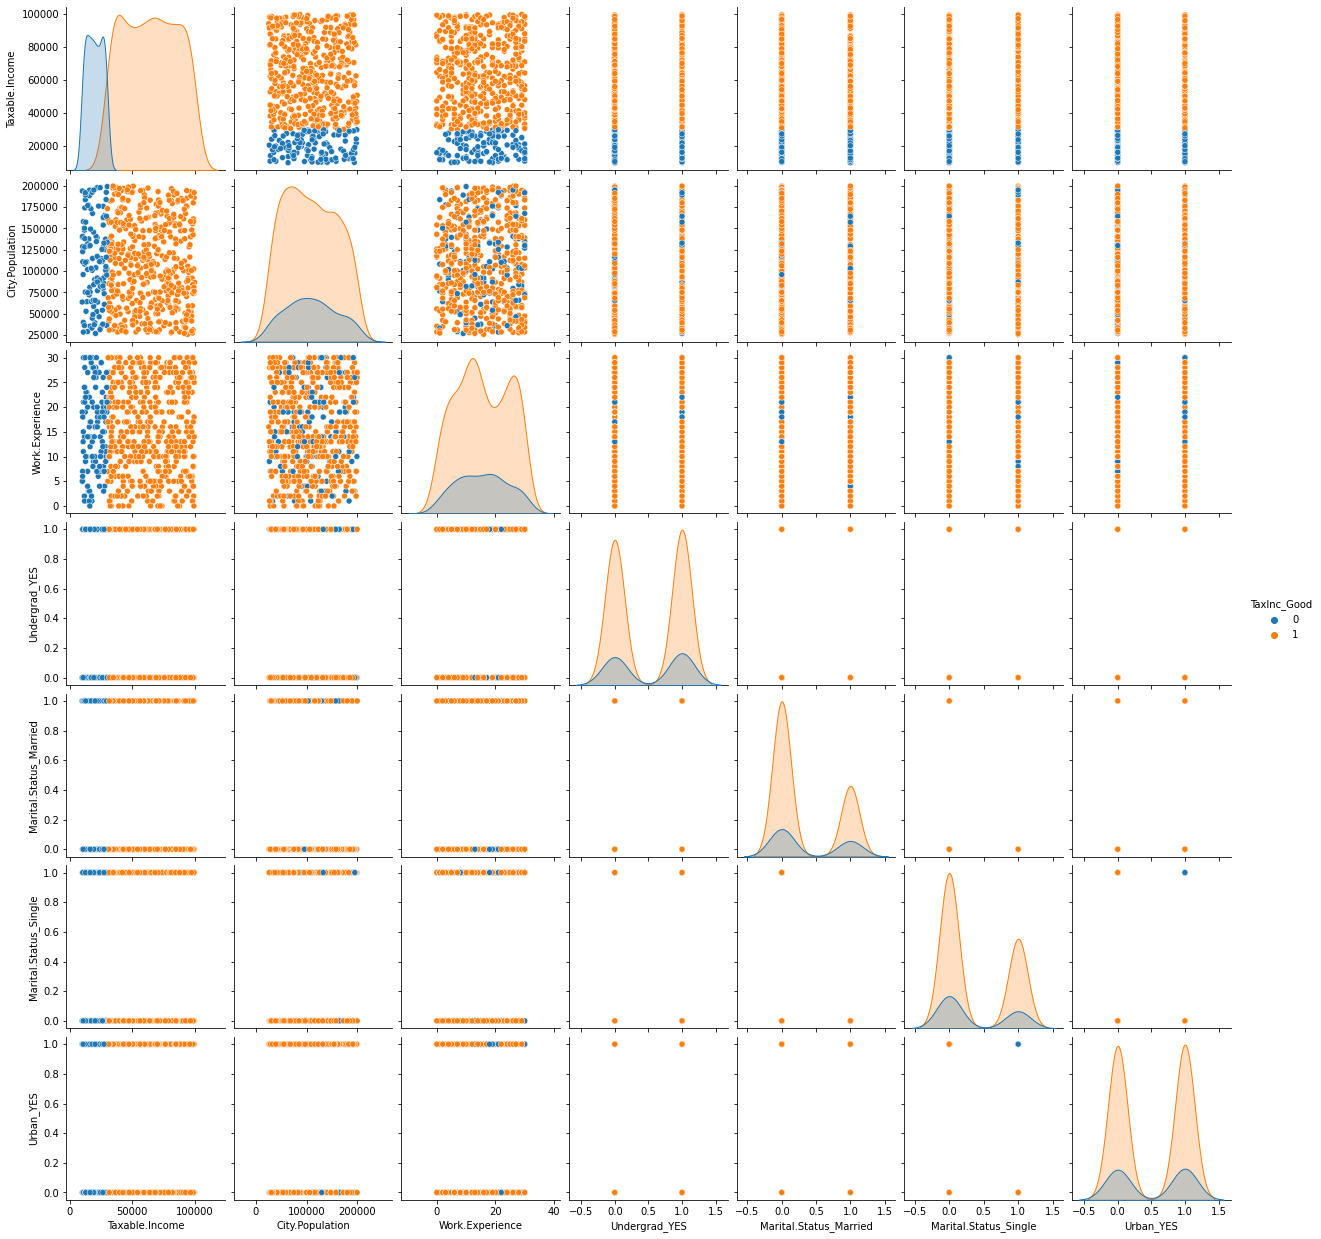

In [ ]:
import seaborn as sns
sns.pairplot(data=df,hue='TaxInc_Good')

In [ ]:
# normalization function
def norm_func(i):
  x = (i-i.min())/(i.max()-i.min())
  return(x)

In [ ]:
# normalized datafram
df_norm = norm_func(df.iloc[:,1:])
df_norm.head(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0
5,0.520710,0.000000,0.0,0.0,0.0,0.0,1.0
6,0.316732,0.266667,0.0,0.0,0.0,1.0,1.0
7,0.606176,0.100000,1.0,0.0,1.0,1.0,1.0
8,0.440819,0.400000,0.0,0.0,1.0,1.0,1.0
9,0.745424,0.133333,1.0,0.0,0.0,1.0,1.0


In [ ]:
df_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [ ]:
X = df_norm.drop(['TaxInc_Good'],axis=1)
y = df_norm['TaxInc_Good']

In [ ]:
# Splitting data into training & testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
df_norm["income"]="<=30000"
df_norm.loc[df["Taxable.Income"]>=30000,"income"]="Good"
df_norm.loc[df["Taxable.Income"]<=30000,"income"]="Risky"

In [ ]:
# droping the taxable income variable
df.drop(["Taxable.Income"],axis=1,inplace=True)

In [ ]:
df.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)

In [ ]:
label_encoder=preprocessing.LabelEncoder()
for column_name in df.columns:
  if df[column_name].dtype == object:
    df[column_name] = label_encoder.fit_transform(df[column_name])
  else:
      pass

In [ ]:
# splitting data into features & labels
features = df.iloc[:,0:5]
labels = df.iloc[:,5]

In [ ]:
colnames = list(df.columns)
colnames

['population',
 'experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

In [ ]:
# spliting data
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.2,random_state=40)

In [ ]:
x_train

,population,experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single
332,84132,1,1,0,0
13,86649,16,0,1,0
274,112584,25,1,1,0
257,31611,17,1,1,0
112,193038,26,1,0,1
...,...,...,...,...,...
440,170407,13,0,0,1
165,38463,23,1,1,0
7,131253,3,1,0,1
219,26814,9,1,0,0


In [ ]:
y_train

332    0
13     1
274    0
257    1
112    1
      ..
440    1
165    1
7      1
219    0
326    1
Name: Urban_YES, Length: 480, dtype: uint8

Building DecisionTreeClassifier using Entropy Criteria



In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

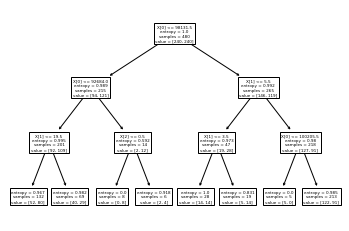

In [ ]:
# plot the decision tree
tree.plot_tree(model);

In [ ]:
colnames = list(df.columns)
colnames

['population',
 'experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

[Text(0.5, 0.875, 'population <= 98131.5\nentropy = 1.0\nsamples = 480\nvalue = [240, 240]\nclass = 1'),
 Text(0.25, 0.625, 'population <= 92684.0\nentropy = 0.989\nsamples = 215\nvalue = [94, 121]\nclass = 0'),
 Text(0.125, 0.375, 'experience <= 19.5\nentropy = 0.995\nsamples = 201\nvalue = [92, 109]\nclass = 0'),
 Text(0.0625, 0.125, 'entropy = 0.967\nsamples = 132\nvalue = [52, 80]\nclass = 0'),
 Text(0.1875, 0.125, 'entropy = 0.982\nsamples = 69\nvalue = [40, 29]\nclass = 1'),
 Text(0.375, 0.375, 'Undergrad_YES <= 0.5\nentropy = 0.592\nsamples = 14\nvalue = [2, 12]\nclass = 0'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8]\nclass = 0'),
 Text(0.4375, 0.125, 'entropy = 0.918\nsamples = 6\nvalue = [2, 4]\nclass = 0'),
 Text(0.75, 0.625, 'experience <= 5.5\nentropy = 0.992\nsamples = 265\nvalue = [146, 119]\nclass = 1'),
 Text(0.625, 0.375, 'experience <= 3.5\nentropy = 0.973\nsamples = 47\nvalue = [19, 28]\nclass = 0'),
 Text(0.5625, 0.125, 'entropy = 1.0\nsamples

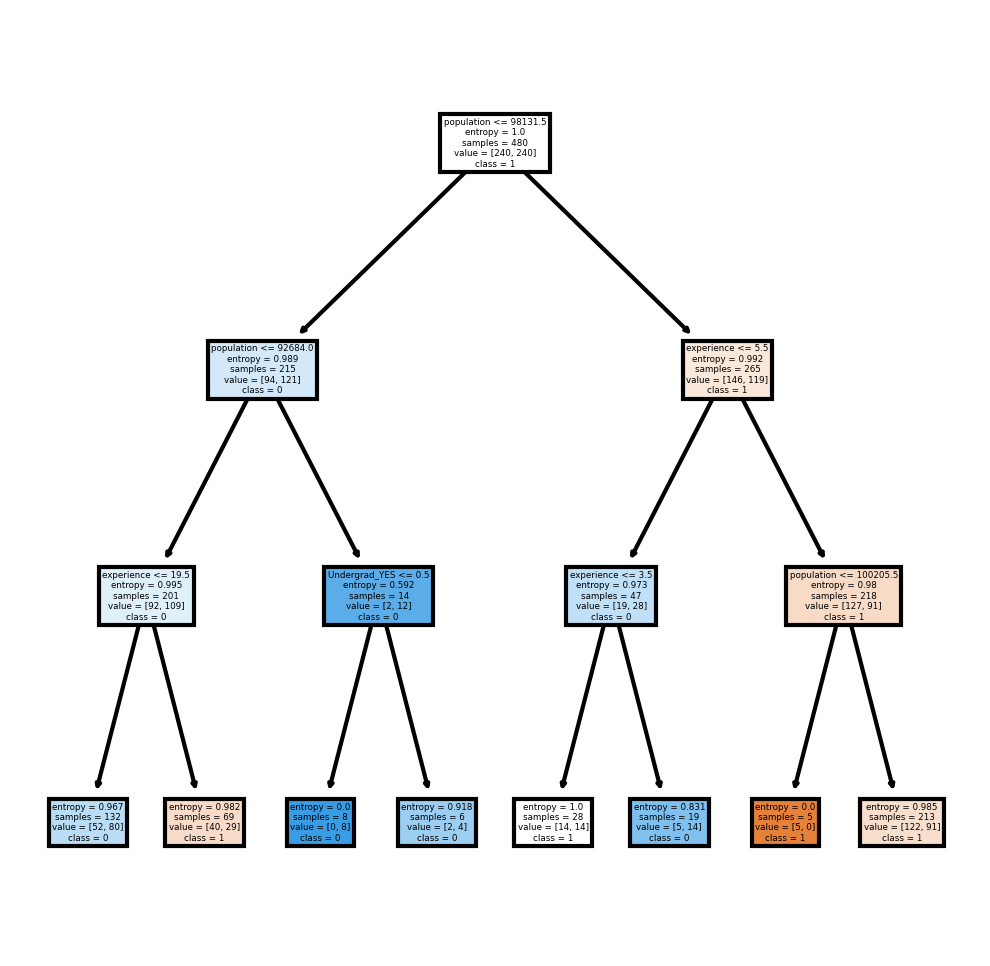

In [ ]:
fn=['population', 'experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES','TaxInc_Good']
cn=['1','0']
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,
               feature_names=fn,
               class_names=cn,
               filled=True)

In [ ]:
# predicting on test data
preds = model.predict(x_test)    # predicting on test data
pd.Series(preds).value_counts()   # getting the count of each category

0    81
1    39
dtype: int64

In [ ]:
y_test

159    0
307    0
253    0
528    0
137    0
      ..
102    0
577    1
18     0
560    0
62     1
Name: Urban_YES, Length: 120, dtype: uint8

In [ ]:
preds

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=uint8)

In [ ]:
pd.crosstab(y_test,preds) # getting 2 way table to understand correct & wrong predictions

col_0,0,1
Urban_YES,,
0,42,16
1,39,23


In [ ]:
#accuracy
np.mean(preds==y_test)

0.5416666666666666

Building Decision Tree Classifier(CART) using Ginni Criteria



In [ ]:
model_gini = DecisionTreeClassifier(criterion = "gini",max_depth=3)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
#prediction and computing tha accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.5416666666666666

Decision Tree Regression Example

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
array = df.values

In [ ]:
X = array[:,0:3]
y = array[:,3]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=1)


In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
# find the accuracy
model.score(X_test,y_test)

-0.9393656716417913